Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "양동훈"
COLLABORATORS = "python"

---

# Exercise: Regression, Interpolation
**강좌**: *Numerical Analysis*

**Due**: 2024/11/20

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Problem #1
Write a function to perform nn-th order regression analysis for a given dataset.

- The function should return the regression coefficients.
- The function should print the correlation coefficient.

In [4]:
# Write your answer
def polyreg(x, y, n):
    """
    Regression for polynomial
    
    Parameters
    ----------
    x : array
        x
    y : array
        y
    n : integer
        order
    
    Returns
    --------
    z : array
        coeffcient of polynomials
    r : float
        correlation coefficient
    """
    # YOUR CODE HERE
    A = np.zeros((n+1,n+1))
    b = np.zeros(n+1)
    for i in range(n+1) :
        b[i] = sum(y*x**i)
        for j in range(n+1) :
            A[i,j] = sum(x**(i+j))
    z = np.linalg.solve(A, b)
    poly = 0
    for i in range(0,len(z)) :
        poly += z[i]*x**i
    Sr = sum((y-poly)**2)
    St = sum((y-y.mean())**2)
    r2 = (St-Sr)/St
    r = np.sqrt(r2)
    print(r)
    return z, r


In [5]:
## Do not remove
# Same problem of lecture note
y = np.array([2.1, 7.7, 13.6, 27.2, 40.9, 61.1])
x = np.array(range(6))
z, r = polyreg(x, y, 2)

# Check your result
assert np.linalg.norm(z - np.array([2.47857143, 2.35928571, 1.86071429])) < 1e-6

0.9992544006900369


## Problem #2
Write a function to perform interpolation using the Lagrange polynomial.:

- Using the function values of $log(x)$ at $x=1,3,4,5,6$, calculate the interpolated value at $x=2$.

- Solve the same problem using Newton's divided difference method and compare the results.

In [6]:
def lagint(xs, fs, x):
    """
    Lagrange Interpolation
    
    Parameters
    ----------
    xs : array
        Data of x
    ys : array
        Data of y
    x: float
        Point to interpolate
    """
    # YOUR CODE HERE
    f = 0
    for xi, fi in zip(xs, fs): #zip으로 쓰면 (1,log(1)) 이런식으로 묶여서 나온다.
    # Compute Li
        Li = 1
        for xj in xs:
            if xi != xj:
                Li *= (x- xj)/(xi - xj)

        f += Li*fi
    return f


# Interpolate log(2) using divided-difference interpolating polynomial using x=1,3,4,5,6 (save as fdd)
# YOUR CODE HERE
xs = [1, 3, 4, 5, 6]
fs = np.log(xs)

def df(xi, xj, fi ,fj): # data가 5개이므로 4차 보간식 이용
    # 1차 유한 차분
    return (fi - fj) / (xi - xj)

def newton_interpolation(xs, fs):
    """
    Newton Divided difference interpolation

    parameters
    ----------------
    xs : array
        data 값
    fs : array
        data에 대한 outcome
    
    Return
    ----------------
    function 

    """
    n = len(xs)
    newton_divided_coef = [fs]  # 0차 차분 

    for i in range(1, n):  # i는 차수 (1차부터 n-1차까지)
        current_diff = []
        for j in range(len(newton_divided_coef[-1]) - 1):  # j는 현재 차분의 인덱스 +1연산이 있어서 len -1 으로 범위를 설정하는거
            i_num_diff = df(xs[j+i], xs[j], newton_divided_coef[-1][j+1], newton_divided_coef[-1][j])
            current_diff.append(i_num_diff)
        newton_divided_coef.append(current_diff)

    # 구한 계수로 다항식을 만든다.
    def interpolation_function(x):
        fi = newton_divided_coef[0][0]  # f[0]
        product_term = 1
        for i in range(1, n):
            product_term *= (x - xs[i - 1]) 
            fi += newton_divided_coef[i][0] * product_term  
        return fi #x에 관한 함수를 반환한다.

    return interpolation_function
result = newton_interpolation(xs, fs)
fdd = result(2) #뉴턴 제차분 방식으로 구한 함수에 특정 값을 넣는다

In [14]:
## Do not remove
xs = [1, 3, 4, 5, 6]
fs = np.log(xs)

# Interpolate using Lagrange Polynomial
flg = lagint(xs, fs, 2)

# Check your result
assert abs(flg - fdd) < 1e-6

## Problem #3
Hooke’s law, which holds when a spring is not stretched too far, signifies that the extension of the spring and the applied force are linearly related. The proportionality is parameterized by the spring constant $k$. A value for this parameter can be established experimentally by placing known weights onto the spring and measuring the resulting compression. Such data were contained in below table and plotted in below figure. Notice that above a weight $40\times10^4 N$, the linear relationship between the force and displacement breaks down. This sort of behavior is typical of what is termed a “hardening spring.” 

(a) Employ linear regression to determine a value of k for the linear portion of this system. Fit a quadratic polynomial to the nonlinear portion. (yellow region)

| Displacement, m | 0.10 | 0.17 | 0.27 | 0.35 | 0.39 | 0.42 | 0.43 | 0.44 |
|-----------------|------|------|------|------|------|------|------|------|
| Force, $10^4 N$ | 10 | 20 | 30 | 40 | 50 | 60 | 70 | 80 |

Text(0, 0.5, 'Force, $10^4$ N')

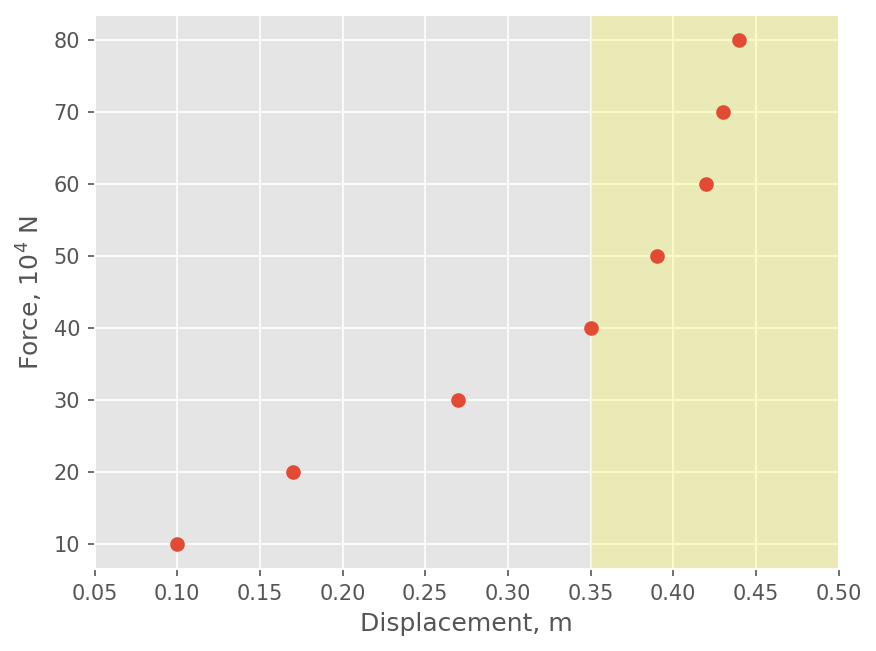

In [8]:
x = np.array([0.10, 0.17, 0.27, 0.35, 0.39, 0.42, 0.43, 0.44])
f = np.array([10, 20, 30, 40, 50, 60, 70, 80])

plt.plot(x, f, linestyle='none', marker='o')
plt.axvspan(0.35, 0.5, alpha=0.2, color='yellow')
plt.xlim(0.05, 0.5)
plt.xlabel('Displacement, m')
plt.ylabel('Force, $10^4$ N')

In [20]:
# Write your answer
def polyreg(x, y, n):
    """
    Regression for polynomial
    
    Parameters
    ----------
    x : array
        x
    y : array
        y
    n : integer
        order
    
    Returns
    --------
    z : array
        coeffcient of polynomials
    r : float
        correlation coefficient
    """
    # YOUR CODE HERE
    A = np.zeros((n+1,n+1))
    b = np.zeros(n+1)
    for i in range(n+1) :
        b[i] = sum(y*x**i)
        for j in range(n+1) :
            A[i,j] = sum(x**(i+j))
    z = np.linalg.solve(A, b)
    poly = 0
    for i in range(0,len(z)) :
        poly += z[i]*x**i
    Sr = sum((y-poly)**2)
    St = sum((y-y.mean())**2)
    r2 = (St-Sr)/St
    r = np.sqrt(r2)
    #print(r)

    def regression_function(x) :
        result = 0
        for i in range(0,len(z)) :
            result += z[i]*x**i
        return result
    

    return z, regression_function

x = np.array([0.10, 0.17, 0.27, 0.35, 0.39, 0.42, 0.43, 0.44])
f = np.array([10, 20, 30, 40, 50, 60, 70, 80])


k = polyreg(x[:4],f[:4],1)
print(f'spring constant{k[0][1]}')

nonlinear_regression  = polyreg(x[3:], f[3:], 2)
fhard = nonlinear_regression[1]
print(f'x값에 대한 fhard 값 {fhard(x)}')



spring constant117.1605789110958
x값에 대한 fhard 값 [346.63001325 200.00490894  72.74066074  40.55765549  47.6756173
  63.16822935  70.2665554   78.33194247]


In [21]:
## Do not remove
x = np.array([0.10, 0.17, 0.27, 0.35, 0.39, 0.42, 0.43, 0.44])
y = fhard(x)

# Check your result
assert abs(f[1] - y[1]) < 182
assert abs(f[3] - y[3]) < 0.6
assert abs(f[6] - y[6]) < 0.3

## Problem #4
Runge’s function is written as:


$$
f(x) = \frac{1}{1 + 25x^2}
$$

(a) Develop a plot of this function for the interval from x = -1 to 1.

(b) Generate and plot the fourth-order Lagrange interpolating polynomial using equispaced function values corresponding to x = -1, -0.5, 0, 0.5, and 1.


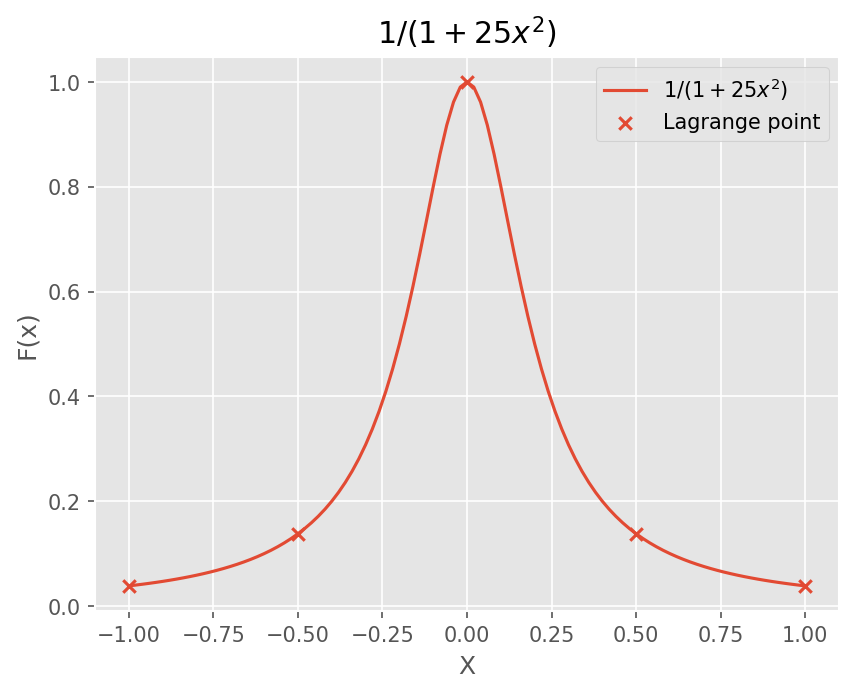

In [11]:
# Write your answer (a)
# YOUR CODE HERE
f = lambda x : 1/(1+25*x**2)
x = np.linspace(-1,1,101)
xis = np.array([-1, -0.5, 0, 0.5, 1])

plt.plot(x,f(x))
plt.scatter(xis, f(xis), marker = 'x')
plt.xlabel('X')
plt.ylabel('F(x)')
plt.legend(['$1/(1+25x^2)$', 'Lagrange point'])
plt.title('$1/(1+25x^2)$')
plt.grid(True)
plt.show()

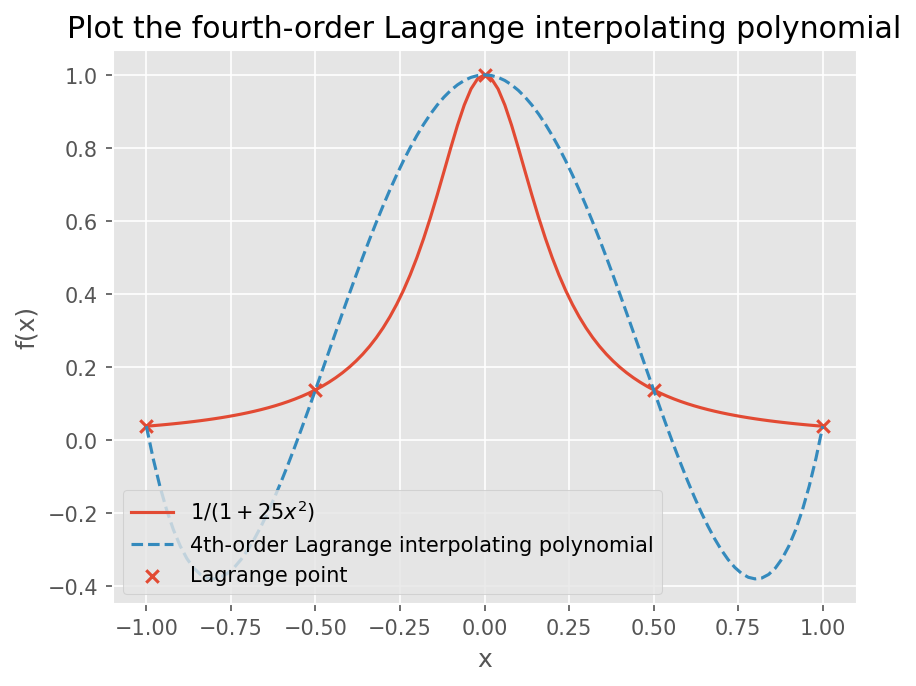

In [12]:
# Write your answer (b)
# YOUR CODE HERE
xis = np.array([-1, -0.5, 0, 0.5, 1])
fis = f(xis)
def lagint(xs, fs, x):
    """
    Lagrange Interpolation
    
    Parameters
    ----------
    xs : array
        Data of x
    ys : array
        Data of y
    x: float
        Point to interpolate
    """
    # YOUR CODE HERE
    f = 0
    for xi, fi in zip(xs, fs): #zip으로 쓰면 (1,log(1)) 이런식으로 묶여서 나온다.
    # Compute Li
        Li = 1
        for xj in xs:
            if xi != xj:
                Li *= (x- xj)/(xi - xj)

        f += Li*fi
    return f
result_point = lagint(xis,fis, xis)

result_plot = lagint(xis, fis, x) 

plt.plot(x, f(x))
plt.plot(x, result_plot, linestyle = '--')
plt.scatter(xis, f(xis), marker = 'x')
plt.legend(['$1/(1+25x^2)$', '4th-order Lagrange interpolating polynomial', 'Lagrange point'])
plt.title('Plot the fourth-order Lagrange interpolating polynomial')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [13]:
# Do not remove!!
def Runge(x):
    return 1/(1 + 25*x**2)

xis = np.array([-1, -0.5, 0, 0.5, 1])
fis = Runge(xis)
lag = lagint(xis, fis, xis)
